# Deep Learning Homework Assignement 1

## Simple Classification

In the first task, we are going to use the code below that generates 3 geometrical shapes (triangle, rectangle and cercle). These shapes and their labels will be our data, then we are using a simple linear neural network to learn to classify the data. We start first with the code to generate the data.

In [1]:
### Importing needed packages
import matplotlib.pyplot as plt
import numpy as np
import keras as ks
import matplotlib.patches as patches

### Defining data generation functions
def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        #if i % 10 == 0:
            #print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]


def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]


def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    #print('Creating data:')
    for i in range(nb_samples):
        #if i % 10 == 0:
            #print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]


def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((72,72))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]


Using TensorFlow backend.


For example, we have the following images.

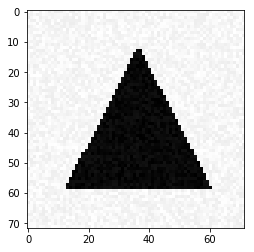

In [2]:
IMAGE_SIZE = 72
im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

Using these functions, we create our dataset for classification. It is important to convert the labels to categorical variables before using the data to train the neural network

Creating data:
[1. 0. 0.]
[1. 0. 0.]
[0. 1. 0.]


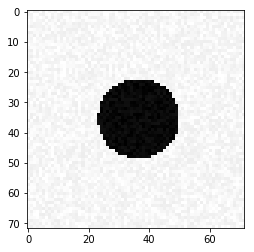

In [3]:
[X_train, Y_train] = generate_dataset_classification(300, 20);
from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train, 3) ### 3 classes 
plt.imshow(X_train[206].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
print(Y_train[206]) 
plt.imshow(X_train[1].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
print(Y_train[1]) 
plt.imshow(X_train[15].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
print(Y_train[15])

We start by building a stochastic gradient descent classifier. We use a function to plot the historical loss for each epoch. The result is as in the following.

In [4]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD 

def loss_history(results):    
    # history for loss
    plt.plot(results.history['loss'])
    plt.plot(results.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
def classifieur_SGD(X_train, Y_train, X_test):
    nb_neurons = 3 
    model = Sequential([Dense(nb_neurons, input_shape=(IMAGE_SIZE*IMAGE_SIZE,))])
    model.add(Dense(3))
    model.add(Activation('softmax'))
    sgd = SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics = ['accuracy'])
    results = model.fit(X_train, Y_train, epochs=30, validation_split=0.3,batch_size=32)
    loss_history(results)
    Y_pred = model.predict(X_test)
    weights=model.get_weights()
    return(Y_pred, weights)

Train on 210 samples, validate on 90 samples
Epoch 1/30
210/210 [==============================] - 0s 806us/step - loss: 1.1310 - acc: 0.3429 - val_loss: 1.0888 - val_acc: 0.3667
Epoch 2/30
210/210 [==============================] - 0s 149us/step - loss: 1.0844 - acc: 0.3476 - val_loss: 1.0522 - val_acc: 0.4000
Epoch 3/30
210/210 [==============================] - 0s 74us/step - loss: 1.0501 - acc: 0.3571 - val_loss: 1.0361 - val_acc: 0.3222
Epoch 4/30
210/210 [==============================] - 0s 149us/step - loss: 1.0340 - acc: 0.3714 - val_loss: 1.0326 - val_acc: 0.4444
Epoch 5/30
210/210 [==============================] - 0s 105us/step - loss: 1.0275 - acc: 0.4714 - val_loss: 1.0290 - val_acc: 0.4667
Epoch 6/30
210/210 [==============================] - 0s 74us/step - loss: 1.0232 - acc: 0.4810 - val_loss: 1.0245 - val_acc: 0.4778
Epoch 7/30
210/210 [==============================] - 0s 149us/step - loss: 1.0173 - acc: 0.4810 - val_loss: 1.0174 - val_acc: 0.4667
Epoch 8/30
210/210 

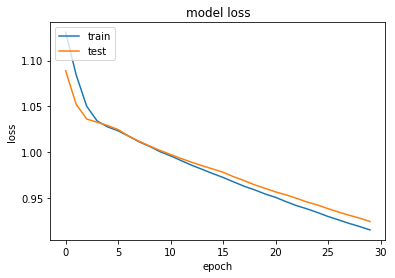

[0. 1. 0.]


In [5]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
Y_pred, WSGD = classifieur_SGD(X_train, Y_train, X_test)
print(max(Y_pred))

We now use the Adam optimizer. The adam optimizer usually leads to better results than stochastic gradient descent. For example, stochastic gradient descent fails to update when it gets to a cost function plateau. As adam combines previous steps with current gradient step, the problem is not encountered. 

Train on 210 samples, validate on 90 samples
Epoch 1/30
210/210 [==============================] - 0s 900us/step - loss: 1.5557 - acc: 0.3190 - val_loss: 1.4944 - val_acc: 0.3667
Epoch 2/30
210/210 [==============================] - 0s 210us/step - loss: 1.3485 - acc: 0.3714 - val_loss: 0.9002 - val_acc: 0.7556
Epoch 3/30
210/210 [==============================] - 0s 278us/step - loss: 0.9560 - acc: 0.6619 - val_loss: 0.8406 - val_acc: 0.7111
Epoch 4/30
210/210 [==============================] - 0s 175us/step - loss: 0.7607 - acc: 0.7143 - val_loss: 0.7107 - val_acc: 0.7889
Epoch 5/30
210/210 [==============================] - 0s 172us/step - loss: 0.7172 - acc: 0.7905 - val_loss: 0.7348 - val_acc: 0.6444
Epoch 6/30
210/210 [==============================] - 0s 171us/step - loss: 0.6493 - acc: 0.7190 - val_loss: 0.6337 - val_acc: 0.7667
Epoch 7/30
210/210 [==============================] - 0s 190us/step - loss: 0.5334 - acc: 0.8190 - val_loss: 0.5580 - val_acc: 0.7333
Epoch 8/30
210/21

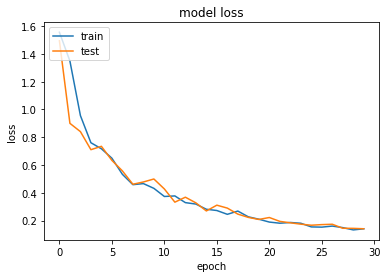

In [6]:
from keras.optimizers import Adam 

def classifieur_Adam(X_train, Y_train, X_test):
    nb_neurons = 3 
    model = Sequential([Dense(nb_neurons, input_shape=(IMAGE_SIZE*IMAGE_SIZE,))])
    model.add(Dense(3))
    model.add(Activation('softmax'))
    adam=Adam(lr=0.0005)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics = ['accuracy'])
    results = model.fit(X_train, Y_train, epochs=30, validation_split=0.3,batch_size=32)
    loss_history(results)
    Y_pred = model.predict(X_test)
    weights=model.get_weights()
    return(Y_pred, weights)
    return(Y_pred, weights)
Y_pred, WADAM = classifieur_Adam(X_train, Y_train, X_test)

We indeed notice that the accuracy with this optimizer is much higher

## Weight Visualisation

The neural network's final classification is based on the last layer's weights. We can visualize them very easily using plt plots.

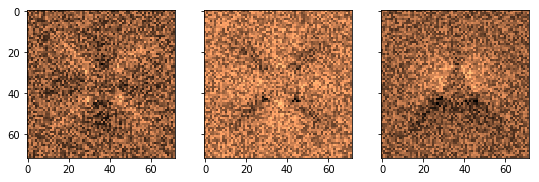

In [7]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True,figsize=(9, 3))
ax1.imshow(WADAM[0][:,0].reshape(72,72), cmap='copper')
ax2.imshow(WADAM[0][:,1].reshape(72,72), cmap='copper')
ax3.imshow(WADAM[0][:,2].reshape(72,72), cmap='copper')

plt.show()

## Classification with convolutional network

The last neural network is a bit too simple. We try to complexify it using convolutionnal architecture. 

In [8]:
[X_train, Y_train] = generate_dataset_classification(600, 20, True)
[X_test, Y_test] = generate_test_set_classification()
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], 72, 72, 1) 
print(X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 72, 72, 1)
Y_train = np_utils.to_categorical(Y_train, 3) ### 3 classes 

def modele_conv():
    from keras.models import Sequential
    from keras.layers import Conv2D, MaxPooling2D

    model = Sequential() 
    model.add(Conv2D(16, kernel_size = (5, 5), strides =(1,1), padding = 'same',  activation='relu', input_shape=(72, 72,1 )))
    model.add(MaxPooling2D(pool_size=(2, 2),strides = (2,2)))
    
    from keras.layers import Dropout 
    model.add(Dropout(0.5))

    from keras.layers import Flatten
    model.add(Flatten())

    from keras.layers import Dense 
    model.add(Dense(3, activation = 'softmax'))

    return model

model = modele_conv()

epoch = 50
lr = 0.0005
decay = lr / epoch
split = 0.2

from keras.optimizers import Adam, SGD
sgd = SGD(lr=0.0005, decay=1e-6, momentum=0.9, nesterov=True)
adam=Adam(lr=lr, decay = decay)
crssent ='categorical_crossentropy'
mse = 'mean_squared_error'
model.compile(loss=crssent, optimizer=adam, metrics=['accuracy']) 
model.fit(X_train, Y_train, batch_size=32, epochs=epoch,validation_split=split, verbose=1)

Creating data:
Creating data:
(600, 5184)
(600, 72, 72, 1)
Train on 480 samples, validate on 120 samples
Epoch 1/50
480/480 [==============================] - 2s 4ms/step - loss: 1.1051 - acc: 0.3854 - val_loss: 1.0257 - val_acc: 0.4917
Epoch 2/50
480/480 [==============================] - 2s 4ms/step - loss: 0.9882 - acc: 0.5521 - val_loss: 0.9357 - val_acc: 0.5750
Epoch 3/50
480/480 [==============================] - 2s 4ms/step - loss: 0.8963 - acc: 0.6417 - val_loss: 0.8973 - val_acc: 0.5333
Epoch 4/50
480/480 [==============================] - 2s 4ms/step - loss: 0.8259 - acc: 0.6562 - val_loss: 0.8661 - val_acc: 0.5750
Epoch 5/50
480/480 [==============================] - 2s 4ms/step - loss: 0.7527 - acc: 0.7083 - val_loss: 0.8637 - val_acc: 0.5417
Epoch 6/50
480/480 [==============================] - 2s 3ms/step - loss: 0.7143 - acc: 0.7146 - val_loss: 0.7516 - val_acc: 0.6667
Epoch 7/50
480/480 [==============================] - 2s 3ms/step - loss: 0.6813 - acc: 0.7208 - val_lo

On arrive a une accuracy de 98%.

In [9]:
score_train= model.evaluate(X_train, Y_train)

score_test= model.evaluate(X_test, Y_test)
print("The train loss= ",score_train)
print("The test  loss= ",score_test)

300/300 [==============================] - 1s 2ms/step
The train loss=  [0.25199134429295855, 0.9400000007947286]
The test  loss=  [0.6970691935221354, 0.7266666666666667]


## A regression Task

The goal now is to predict the image locations of the vertices of a triangle, given an image of this triangle. We quickly encounter a problem because the vertices of the triangle have random locations. We need to sort them (such that we can say verticle 1, vertice 2 .. )

[0.94133439 0.93818117 0.67661723 0.27556678 0.36340393 0.33217252]


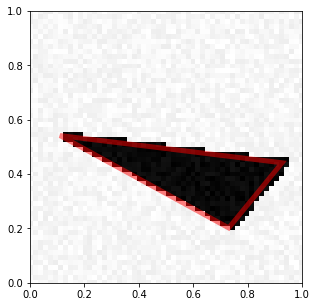

In [27]:
## Generating Regression Data
[X_train, Y_train] = generate_dataset_regression(300, 20)
[X_test, Y_test] = generate_test_set_regression()
print(Y_test[0])
visualize_prediction(X_train[0], Y_train[0])

In [11]:
X_train = X_train.reshape(X_train.shape[0], 72,72,1)
Y_train_reg_ = Y_train.reshape(Y_train.shape[0], 3,2)
Y_train_reg_ =np.array([i[i[:,0].argsort()] for i in Y_train_reg_]) 
Y_train_reg_ = Y_train_reg_.reshape(Y_train_reg_.shape[0], 6,)

[[0.97971582 0.98408924 0.9952138  ... 0.96632057 0.96371418 0.99983144]
 [0.980205   0.9494385  0.99064977 ... 0.98630824 0.94669241 0.95031914]
 [0.97088494 0.99175157 0.94548286 ... 0.95201227 0.98255148 0.96649708]
 ...
 [0.9523247  0.97840249 0.93896908 ... 0.98016863 0.99638629 0.95958723]
 [0.93346973 0.95200522 0.93995049 ... 0.95783797 0.99963013 0.96107242]
 [0.98362736 0.97104303 0.96238696 ... 0.95144482 0.95233239 0.99051286]]


In [19]:
print(X_test.shape)

(300, 5184)


We use a similar convolutional architecture and we get the following (more complex) model

In [14]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import itertools
from keras.optimizers import Adam,SGD


def model_regressor():
    model = Sequential()
    nb_neurons = 16
    
    model.add(Conv2D(nb_neurons, kernel_size = (5, 5), strides =(1,1), padding ='valid', input_shape=(72, 72, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(nb_neurons, kernel_size = (5, 5), strides =(1,1), padding ='valid'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides = (2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Activation('relu'))
    
    model.add(Conv2D(nb_neurons, kernel_size = (5, 5), strides =(1,1), padding ='valid'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides = (2,2)))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    
    model.add(Flatten()) 
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
   
    model.add(Dense(6))
    model.add(BatchNormalization())
    model.add(Activation('linear'))

    return model

In [15]:
model = model_regressor()

epoch = 50
lr = 0.0005
decay = lr / epoch
from keras.optimizers import Adam
adam=Adam(lr=lr, decay = 0.9)
mse = 'mean_squared_error'
model.compile(loss=mse, optimizer=adam, metrics=['accuracy']) 
model.fit(X_train, Y_train, batch_size=32, epochs=epoch,validation_split=0.3)

Train on 210 samples, validate on 90 samples
Epoch 1/50
210/210 [==============================] - 7s 35ms/step - loss: 1.2198 - acc: 0.2286 - val_loss: 1.1793 - val_acc: 0.1889
Epoch 2/50
210/210 [==============================] - 5s 26ms/step - loss: 1.1204 - acc: 0.2952 - val_loss: 1.1006 - val_acc: 0.2222
Epoch 3/50
210/210 [==============================] - 5s 25ms/step - loss: 1.1079 - acc: 0.2810 - val_loss: 1.0572 - val_acc: 0.2222
Epoch 4/50
210/210 [==============================] - 5s 25ms/step - loss: 1.1163 - acc: 0.2381 - val_loss: 1.0286 - val_acc: 0.2111
Epoch 5/50
210/210 [==============================] - 5s 25ms/step - loss: 1.1069 - acc: 0.2571 - val_loss: 0.9938 - val_acc: 0.2333
Epoch 6/50
210/210 [==============================] - 5s 26ms/step - loss: 1.1011 - acc: 0.2429 - val_loss: 0.9654 - val_acc: 0.2333
Epoch 7/50
210/210 [==============================] - 5s 25ms/step - loss: 1.1078 - acc: 0.2238 - val_loss: 0.9568 - val_acc: 0.2222
Epoch 8/50
210/210 [====

[ 0.58422965 -0.8762784   1.3552525  -0.15072483 -0.19482136 -0.49705052]


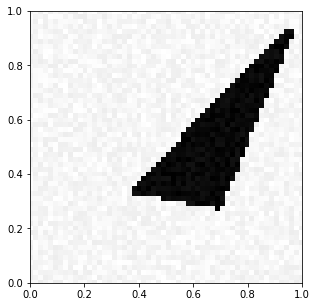

In [25]:
X_test = X_test.reshape(X_train.shape[0], 72,72,1)

Y_pred = model.predict(X_test)
print(Y_pred[0])
visualize_prediction(X_test[0], Y_pred[0])

# Image Denoising

Finally, we tackle the topic of image denoising using an U net architecture. We first write a function code that generates images with/without noise. Then we use them in an hourglass CNN network to perform the denoising.

In [28]:
def generate_a_triangle_noise(noise, b):
    figsize = 1.0
    if b:
        X = np.random.random(3)
        Y = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        mid = figsize/2
        X = (mid, mid+size, mid-size)
        Y = (mid+size, mid-size, mid-size)
    imdata = generate_a_drawing(figsize, X, Y, 0.0)
    imdata_noise =  generate_a_drawing(figsize, X, Y, noise)
    return [imdata,imdata_noise]

def generate_trigdata_denoise(nb_samples,noise_d, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, im_size])
    for i in range(nb_samples):
        [X[i], Y[i]] = generate_a_triangle_noise(noise_d, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [29]:
[X_train,Y_train] =generate_trigdata_denoise(300,20)
X_train=X_train.reshape(X_train.shape[0] ,72,72,1 )
Y_train=Y_train.reshape(X_train.shape[0] ,72,72,1 )

In [30]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import itertools
from keras.optimizers import Adam,SGD


def hourglass_model():
    autoencodeur = Sequential()

    autoencodeur.add(Conv2D(16, (5, 5), activation='relu', input_shape=(72, 72, 1),padding='same'))
    autoencodeur.add(MaxPooling2D(pool_size=(2, 2)))
    autoencodeur.add(Dropout(0.25))

    autoencodeur.add(Conv2D(32, (5, 5), activation='relu'))
    autoencodeur.add(MaxPooling2D(pool_size=(2, 2)))
    autoencodeur.add(Dropout(0.25))

    autoencodeur.add(Conv2D(64, (5, 5), activation='relu',padding='same'))
    autoencodeur.add(UpSampling2D((2, 2)))

    autoencodeur.add(Conv2DTranspose(32, kernel_size =(5,5), strides=(1,1),activation='relu'))
    autoencodeur.add(Dropout(0.25))
    autoencodeur.add(UpSampling2D((2, 2)))

    autoencodeur.add(Conv2D(16, (5, 5), activation='relu',padding='same'))

    #autoencodeur.add(Conv2D(1, (3, 3), activation='relu' ,padding='same'))

    autoencodeur.add(Conv2D(1, (1, 1), activation='sigmoid' ,padding='same'))
    
    return autoencodeur

    

autoencoder = hourglass_model()
epoch = 50
lr = 0.00001
decay = lr / epoch
split = 0.2
from keras.optimizers import Adam
adam=Adam(lr=lr, decay = 0.9)
autoencoder.compile(loss='mean_squared_error', optimizer=adam)
autoencoder.fit(X_train, Y_train, batch_size=32, epochs=epoch, validation_split=split )

Train on 240 samples, validate on 60 samples
Epoch 1/50
240/240 [==============================] - 10s 43ms/step - loss: 66287.0146 - val_loss: 65913.7057
Epoch 2/50
240/240 [==============================] - 10s 40ms/step - loss: 66286.0005 - val_loss: 65913.3156
Epoch 3/50
240/240 [==============================] - 10s 41ms/step - loss: 66285.5760 - val_loss: 65913.0740
Epoch 4/50
240/240 [==============================] - 10s 42ms/step - loss: 66285.2792 - val_loss: 65912.9099
Epoch 5/50
240/240 [==============================] - 10s 43ms/step - loss: 66285.0318 - val_loss: 65912.7771
Epoch 6/50
240/240 [==============================] - 10s 42ms/step - loss: 66284.8385 - val_loss: 65912.6677
Epoch 7/50
240/240 [==============================] - 10s 42ms/step - loss: 66284.7047 - val_loss: 65912.5781
Epoch 8/50
240/240 [==============================] - 11s 45ms/step - loss: 66284.6177 - val_loss: 65912.4927
Epoch 9/50
240/240 [==============================] - 13s 55ms/step - loss:

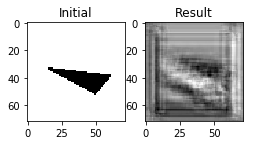

In [33]:
plt.subplot(131)
plt.title('Initial')
plt.imshow(X_train[0].reshape(72,72), cmap='gray')

plt.subplot(132)
plt.title('Result')
plt.imshow(1-autoencoder.predict(X_train[0].reshape(1, 72,72,1)).reshape(72,72), cmap='gray')